In [2]:
import pandas as pd
import numpy as np
from torch.utils.data.dataset import Dataset
import requests as rq
from io import BytesIO
from tqdm import tqdm
import mysql.connector

Collecting data from web

In [2]:
sectors = pd.read_csv("../data/stocks/sectors.csv")
sectors = sectors[["표준코드", "단축코드", "상장일"]]

url_price = "http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd"

data_price = {
    "locale": "ko_KR",
    "tboxisuCd_finder_stkisu0_1": "005930/삼성전자",
    "isuCd": "KR7005930003",
    "isuCd2": "KR7005930003",
    "codeNmisuCd_finder_stkisu0_1": "삼성전자",
    "param1isuCd_finder_stkisu0_1": "ALL",
    "strtDd": "19750611",
    "endDd": "20250319",
    "adjStkPrc_check": "Y",
    "adjStkPrc": "2",
    "share": "1",
    "money": "1",
    "csvxls_isNo": "false",
    "name": "fileDown",
    "url": "dbms/MDC/STAT/standard/MDCSTAT01701"
}

headers = {
    "Referer": "http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020203",
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36"
}

otp_indv = rq.post(url_price, data_price, headers=headers).text

indv_down_url = "http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd"

# 서버로부터 데이터 요청 후 읽어들이기
indv_down = rq.post(url=indv_down_url, data={"code": otp_indv}, headers=headers)
indv_price = pd.read_csv(BytesIO(indv_down.content), encoding="EUC-KR")

In [5]:
indv_price.to_csv("../data/stocks/삼성전자.csv")

In [6]:
data = pd.read_csv("../data/stocks/삼성전자.csv")
data.head()

,Unnamed: 0,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,0,2025/03/19,58500,900,1.56,57400,59200,57400,29421759,1727220604750,346298818437000,5919637922
1,1,2025/03/18,57600,0,0.00,58800,59000,57300,28138594,1638462319270,340971144307200,5919637922
2,2,2025/03/17,57600,2900,5.30,55500,57800,55400,35559021,2036156585500,340971144307200,5919637922
3,3,2025/03/14,54700,0,0.00,54500,55100,54400,10845154,594158589200,323804194333400,5919637922
4,4,2025/03/13,54700,-200,-0.36,55800,55900,54200,24132151,1327792389578,323804194333400,5919637922


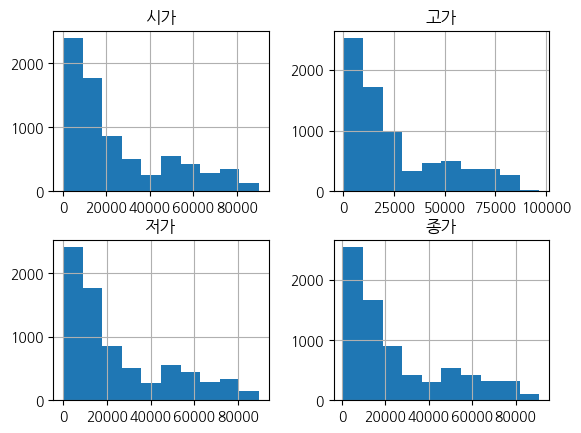

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

data_used = data.iloc[:, 5:8]
data_used["종가"] = data["종가"]
hist = data_used.hist()
plt.show()

Collecting data from database

In [61]:
sectors = pd.read_csv("/home/john/dev_ws/eda/data/sectors.csv") # ssh에 sectors 파일 업로드

std = []
name = []
for i in range(len(sectors)):
   std.append(sectors.iloc[i, 1])
   name.append(sectors.iloc[i, 4])

In [62]:
aws = mysql.connector.connect(
        host = "database-1.c3ykuqosgy9m.ap-northeast-2.rds.amazonaws.com",
        port = 3306,
        user = "root",
        password = "kim4582345",
        database = "joseon_ameba"
        )
    
cur = aws.cursor(buffered=True)

In [201]:
sql = f"select closing_price from stock_price_per_date where std_code = '{std[907]}'"
cur.execute(sql)

result = cur.fetchall()
result

[(1544,),
 (1596,),
 (1583,),
 (1576,),
 (1564,),
 (1544,),
 (1512,),
 (1467,),
 (1480,),
 (1441,),
 (1441,),
 (1454,),
 (1486,),
 (1467,),
 (1454,),
 (1467,),
 (1467,),
 (1467,),
 (1454,),
 (1441,),
 (1396,),
 (1370,),
 (1441,),
 (1408,),
 (1428,),
 (1460,),
 (1512,),
 (1512,),
 (1564,),
 (1564,),
 (1544,),
 (1538,),
 (1538,),
 (1551,),
 (1544,),
 (1531,),
 (1499,),
 (1505,),
 (1525,),
 (1538,),
 (1525,),
 (1499,),
 (1499,),
 (1512,),
 (1499,),
 (1492,),
 (1557,),
 (1564,),
 (1576,),
 (1557,),
 (1576,),
 (1538,),
 (1538,),
 (1596,),
 (1686,),
 (1751,),
 (1855,),
 (1868,),
 (1887,),
 (1887,),
 (1803,),
 (1790,),
 (1790,),
 (1842,),
 (1797,),
 (1797,),
 (1803,),
 (1835,),
 (1835,),
 (1803,),
 (1810,),
 (1810,),
 (1803,),
 (1816,),
 (1842,),
 (1810,),
 (1751,),
 (1686,),
 (1680,),
 (1686,),
 (1699,),
 (1771,),
 (1712,),
 (1686,),
 (1712,),
 (1719,),
 (1699,),
 (1725,),
 (1706,),
 (1712,),
 (1712,),
 (1725,),
 (1751,),
 (1764,),
 (1790,),
 (1790,),
 (1797,),
 (1764,),
 (1784,),
 (1816,),


In [202]:
values = [x[0] for x in result]
print(values)

[1544, 1596, 1583, 1576, 1564, 1544, 1512, 1467, 1480, 1441, 1441, 1454, 1486, 1467, 1454, 1467, 1467, 1467, 1454, 1441, 1396, 1370, 1441, 1408, 1428, 1460, 1512, 1512, 1564, 1564, 1544, 1538, 1538, 1551, 1544, 1531, 1499, 1505, 1525, 1538, 1525, 1499, 1499, 1512, 1499, 1492, 1557, 1564, 1576, 1557, 1576, 1538, 1538, 1596, 1686, 1751, 1855, 1868, 1887, 1887, 1803, 1790, 1790, 1842, 1797, 1797, 1803, 1835, 1835, 1803, 1810, 1810, 1803, 1816, 1842, 1810, 1751, 1686, 1680, 1686, 1699, 1771, 1712, 1686, 1712, 1719, 1699, 1725, 1706, 1712, 1712, 1725, 1751, 1764, 1790, 1790, 1797, 1764, 1784, 1816, 1835, 1920, 1920, 1959, 1985, 1998, 1998, 1965, 1933, 1972, 2082, 2082, 2140, 2121, 2160, 2166, 2134, 2147, 2199, 2192, 2166, 2166, 2147, 2140, 2114, 2160, 2173, 2199, 2218, 2205, 2160, 2153, 2153, 2140, 2153, 2147, 2186, 2179, 2160, 2166, 2179, 2160, 2166, 2244, 2231, 2199, 2186, 2166, 2179, 2179, 2186, 2192, 2205, 2212, 2218, 2199, 2069, 2043, 2062, 1972, 1998, 1887, 1829, 1933, 1933, 1900, 189

In [203]:
np.max(values)

np.int64(91000)

In [204]:
test = values / np.max(values)
test

array([0.01696703, 0.01753846, 0.0173956 , ..., 0.63516484, 0.64615385,
       0.64615385], shape=(7550,))

In [205]:
import numpy as np

from torch.utils.data.dataset import Dataset

class ECO(Dataset):
    def __init__(self):
       self.csv = values

       # 입력 데이터 정규화
       self.data = self.csv   # 종가 데이터
       self.data = self.data / np.max(self.data)  # 0과 1 사이로 정규화

       # 종가 데이터 정규화
       self.label = self.csv       
       self.label = self.label / np.max(self.label)

    def __len__(self):
       return len(self.data) - 30
    
    def __getitem__(self, i):
       data = self.data[i:i+30]
       label = self.label[i+30]

       return data, label
    



In [206]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        # RNN층의 정의
        self.rnn = nn.RNN(input_size=1, hidden_size=8, num_layers=5,
                            batch_first=True)

        # 주가를 예측하는 MLP층 정의
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)

        self.relu = nn.Tanh() # 활성화 함수 정의
        
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0)  # RNN층의 출력

        # MLP층의 입력으로 사용되게 모양 변경
        x = torch.reshape(x, (x.shape[0], -1))

        # MLP층을 이용해 종가 예측
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        # 예측한 종가를 1차원 벡터로 표현
        x = torch.flatten(x)

        return x
    

In [207]:
import tqdm

from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"

model = RNN().to(device)  # 모델의 정의
dataset = ECO()       # 데이터셋의 정의

In [208]:
loader = DataLoader(dataset, batch_size=32)  # 배치 크기를 32로 설정
optim = Adam(params=model.parameters(), lr=0.0001) # 사용할 최적화 설정

In [209]:
a = torch.tensor(dataset.data)
a.shape

torch.Size([7550])

In [211]:
for epoch in range(100):
     iterator = tqdm.tqdm(loader)
     for data, label in iterator:
          data = data.type(torch.float32).to(device)
          label = label.type(torch.float32).to(device)

          # 초기 은닉 상태
          h0 = torch.zeros(5, data.size(0), 8).to(device)

          if data.dim() == 2:  # (batch_size, seq_len)
               data = data.unsqueeze(-1)

          optim.zero_grad()
     
          # 모델의 예측값
          pred = model(data, h0)

          # 손실의 계산
          loss = nn.MSELoss()(pred, label)
          loss.backward()  # 오차 역전파
          optim.step()     # 최적화 진행

          iterator.set_description(f"epoch{epoch} loss:{loss.item()}")

torch.save(model.state_dict(), "./rnn_sam.pth")  # 모델 저장

epoch99 loss:0.0012957715662196279: 100%|██████████| 235/235 [00:01<00:00, 219.95it/s] 


In [216]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import DataLoader

loader = DataLoader(dataset, batch_size=1)  # 과거 데이터를 예측하기 위한 데이터로더


# 예측값 저장 리스트
preds = []

# 모델 가중치 불러오기
model.load_state_dict(torch.load("rnn_sam.pth", map_location=device))
model.eval()  # 평가 모드 설정

with torch.no_grad():
    for data in loader:
        data = data[0].type(torch.float32).to(device)  # 데이터만 사용

        # 초기 은닉 상태 설정
        h0 = torch.zeros(5, data.shape[0], 8).to(device)  

        if data.dim() == 2:  # 데이터 차원 맞추기 (batch_size, seq_len)
            data = data.unsqueeze(-1)

        # 모델 예측 수행
        pred = model(data, h0)
        
        # 예측값에 가우시안 노이즈 추가 (필요하면 사용)
        noise = torch.tensor(np.random.normal(0, 0.01), dtype=torch.float32).to(device)
        pred = pred + noise

        # 예측값 저장
        preds.append(pred.item())

# 실제 데이터(result)와 예측값(preds)을 NumPy 배열로 변환
labels = np.array(values[30:30+len(preds)])  # 실제값 (result에서 예측값 길이만큼 가져오기)
preds = np.array(preds)  # 예측값
preds = preds * np.max(values)

# MAPE 계산
# MAPE 계산 (0으로 나누는 경우 방지)
mape = np.mean(np.abs((labels - preds) / (labels + 1e-8))) * 100

print(f"MAPE: {mape:.4f}%")


MAPE: 119.6899%


MAPE 값	예측 성능

0 ~ 10%	매우 우수 (Excellent)

10 ~ 20%	좋음 (Good)

20 ~ 50%	보통 (Reasonable)

50% 이상	예측 성능이 낮음 (Poor)

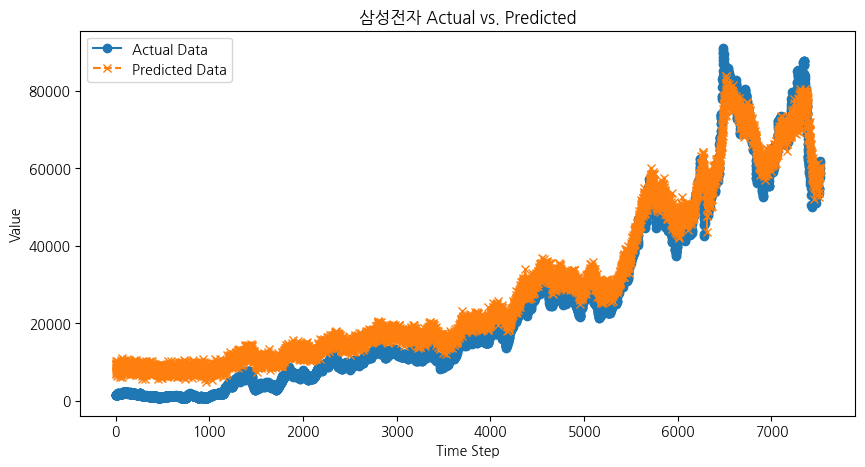

In [217]:
import koreanize_matplotlib
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(labels, label="Actual Data", marker="o", linestyle="-")
plt.plot(preds, label="Predicted Data", marker="x", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("삼성전자 Actual vs. Predicted")
plt.legend()
plt.show()

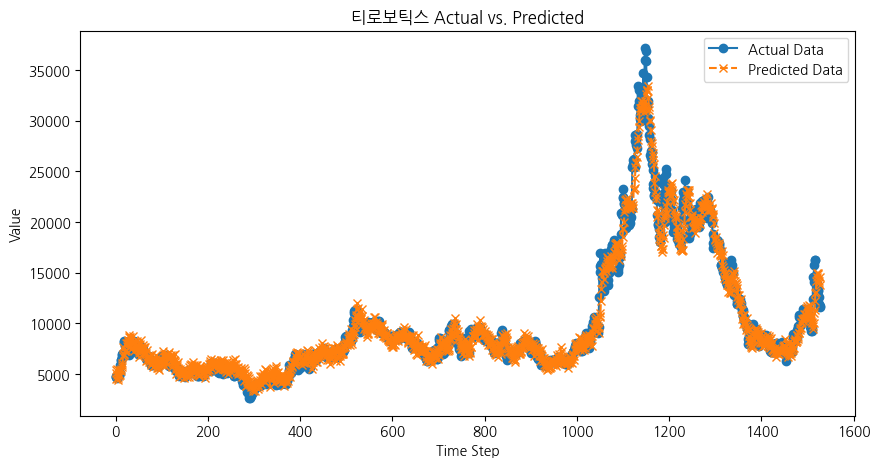

In [200]:
import koreanize_matplotlib
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(labels, label="Actual Data", marker="o", linestyle="-")
plt.plot(preds, label="Predicted Data", marker="x", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("티로보틱스 Actual vs. Predicted")
plt.legend()
plt.show()

In [218]:
preds = []
data_seq = dataset.data[-30:].reshape(1, -1, 1)  # 최근 30일 데이터를 초기 입력으로 사용
data_seq = torch.tensor(data_seq, dtype=torch.float32).to(device)

with torch.no_grad():
    model.load_state_dict(torch.load("rnn.pth", map_location=device))
    model.eval()

    h0 = torch.zeros(5, 1, 8).to(device)

    for j in range(30):
        pred = model(data_seq, h0)
        noise = torch.tensor(np.random.normal(0, 0.01), dtype=torch.float32).to(device)
        pred = pred + noise
        preds.append(pred.item())

        new_data = torch.tensor([[pred.item()]], dtype=torch.float32).to(device)
        data_seq = torch.cat((data_seq[:, 1:, :], new_data.unsqueeze(1)), dim=1)

# 예측치 표준화
standardized = np.array(preds) * np.max(values)

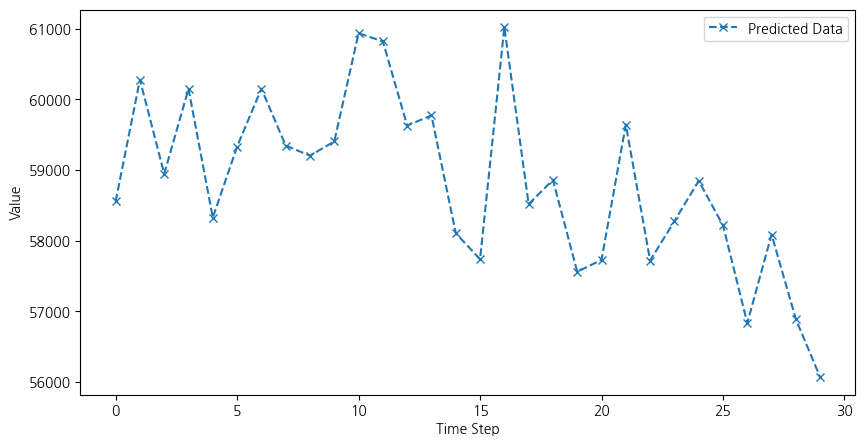

In [219]:
plt.figure(figsize=(10, 5))
plt.plot(standardized, label="Predicted Data", marker="x", linestyle="--")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

In [220]:
aws.close()